# Onedrivedownloader Test

This notebook tests using the `onedrivedownloader` package to download shared OneDrive files and then tests using `nibabel` to display the NIfTI files (`xxx.ni.gz`)

## 1. Installation and imports

In [1]:
!pip install onedrivedownloader nibabel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from onedrivedownloader import download
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

## 2. environmental variables

In [43]:
# create a data directory and set some variables
!mkdir data

DATA_DIR = 'data'
IMG_SEGM_DIR = os.path.join(DATA_DIR, "images_segm")
IMG_STRUCT_DIR = os.path.join(DATA_DIR, "images_structural")
IMG_REDUCED_DIR = os.path.join(DATA_DIR, "data", "images_annot_reduced")
IMG_AUTO_SEGM_DIR = os.path.join(DATA_DIR, "automated_segm")
IMG_AUTO_SEGM_REDUCED_DIR = os.path.join(DATA_DIR, "automated_segm_reduced")

STRUCT_SCANS = ["FLAIR", "T1", "T1GD", "T2"]

In [4]:
IMAGES_SEGM_URL = "https://rice-my.sharepoint.com/:u:/g/personal/hl9_rice_edu/EbmrLEe1ZgpNkaujtMtlDIEB9rQ0Zj82dOWIttA8sD5lSg"
IMAGES_SEGM_FNAME = "images_segm.zip" 
DATA_URL = "https://rice-my.sharepoint.com/:u:/r/personal/hl9_rice_edu/Documents/capstone%20project/GBM%20dataset/images_annot_reduced.zip?csf=1&web=1&e=fnEGdO"
IMAGES_STRUCTURAL_URL = "https://rice-my.sharepoint.com/:u:/g/personal/hl9_rice_edu/ER8oOEAm1ANGlK4sodUPdX0B6_7IxmbRoneyo-RXI2HYOg"
IMAGES_STRUCTURAL_FNAME = "images_structural.zip"

IMAGES_ANNOT_REDUCED_URL = "https://rice-my.sharepoint.com/:u:/g/personal/hl9_rice_edu/EfqrvokObOJEhovsqLl_sscBgplo836OUdN5kJzAYqPZyg"
IMAGES_ANNOT_REDUCED_FNAME = "images_annot_reduced.zip"

IMAGES_AUTO_SEGM_URL = "https://rice-my.sharepoint.com/:u:/g/personal/hl9_rice_edu/EToY-Cli4vxMqYwHx_NZ4JsBi1Lo8tOskj9zb4_AZmDfcg"
IMAGES_AUTO_SEGM_FNAME = "automated_segm.zip"

IMAGES_AUTO_SEGM_REDUCED_URL = "https://rice-my.sharepoint.com/:u:/g/personal/hl9_rice_edu/EXwqKvC8QpBBjFQUXzKR1-IBtJeP1hwXUQAoJOneJx4-Hw"
IMAGES_AUTO_SEGM_REDUCED_FNAME = "automated_segm_reduced.zip"

## 3. Download `UPENN-GBM_data_availability.csv`

In [5]:
# Download the data availability file as a first test
url = "https://rice-my.sharepoint.com/:x:/g/personal/hl9_rice_edu/EfP_9oYyhvxDv7lovcSiOgYB9aPYlpr6xd7kBzmHMKVKtA"
fn = "UPENN-GBM_data_availability.csv"
download(url, filename=DATA_DIR + "/" + fn)

100%|██████████| 128k/128k [00:00<00:00, 14.0MiB/s]


'data/UPENN-GBM_data_availability.csv'

**Finding**: `onedrivedownloader` works as long the file permissions are open

## 4. Download images

In [6]:
#####################################################################
# THIS IS ONLY NEEDED IF YOU WANT TO UNZIP EACH OF THE NII FILES ...
# HOWEVER THIS IS UNNECESSARY AS NIBABEL CAN WORK WITH THEM DIRECTLY
#####################################################################

# import gzip
# import shutil

# # unzip the contents inside images_segm
# data_dir = "data/GBM dataset"
# target_dir = "images_segm"

# # get a list of zipped files
# zipped_files = os.listdir(data_dir + '/' + target_dir)

# # iterate over the list and unzip the archives, writing them back out to disk
# # https://stackoverflow.com/a/44712152
# for file in zipped_files:
#     file_path = data_dir + '/' + target_dir + '/' + file
#     with gzip.open(file_path, mode="rb") as archive:
#         with open(file_path.split(".gz")[0], mode="wb") as f_out:
#             shutil.copyfileobj(archive, f_out)

In [7]:
# download the images
# note that onedrivedownloader, unless told not to, will automatically inflate the zip file

# 1. baseline pre-operative scans
download(IMAGES_STRUCTURAL_URL, filename=os.path.join(DATA_DIR, IMAGES_STRUCTURAL_FNAME))

# 2. segmented using DeepMedic, DeepSCAN, and nnUNet, combined using STAPLE
download(IMAGES_AUTO_SEGM_URL, filename=os.path.join(DATA_DIR, IMAGES_AUTO_SEGM_FNAME))

# 3. manually adjusted/refined labels 
download(IMAGES_SEGM_URL, filename=os.path.join(DATA_DIR, IMAGES_SEGM_FNAME))

# 4. reduced images
download(IMAGES_ANNOT_REDUCED_URL, filename=os.path.join(DATA_DIR, IMAGES_ANNOT_REDUCED_FNAME))
download(IMAGES_AUTO_SEGM_REDUCED_URL, filename=os.path.join(DATA_DIR, IMAGES_AUTO_SEGM_REDUCED_FNAME))

100%|██████████| 5.85G/5.85G [01:32<00:00, 63.2MiB/s]


Unzipping file...


Extracting files: 100%|██████████| 3355/3355 [01:11<00:00, 47.19it/s]
100%|██████████| 10.3M/10.3M [00:00<00:00, 55.9MiB/s]


Unzipping file...


Extracting files: 100%|██████████| 611/611 [00:00<00:00, 2801.23it/s]
100%|██████████| 2.63M/2.63M [00:00<00:00, 64.0MiB/s]


Unzipping file...


Extracting files: 100%|██████████| 147/147 [00:00<00:00, 2528.15it/s]
100%|██████████| 1.46G/1.46G [00:20<00:00, 70.4MiB/s]


Unzipping file...


Extracting files: 100%|██████████| 736/736 [00:14<00:00, 49.30it/s]
100%|██████████| 1.86M/1.86M [00:00<00:00, 46.2MiB/s]


Unzipping file...


Extracting files: 100%|██████████| 148/148 [00:00<00:00, 1893.32it/s]


'data'

We've now successfully downloaded the data availability csv, and the images using OneDriveDownloader. Let's now try visualizing some of it!

## 5. Nibabel visualization tests

In [8]:
# get a listing of the manually revised segmentation labels
segm_files = os.listdir(IMG_SEGM_DIR)
segm_files.sort()
print(f"Number of manually-revised segmentation labels: {len(segm_files)}")
print(segm_files[:10])

Number of manually-revised segmentation labels: 147
['UPENN-GBM-00002_11_segm.nii.gz', 'UPENN-GBM-00006_11_segm.nii.gz', 'UPENN-GBM-00008_11_segm.nii.gz', 'UPENN-GBM-00009_11_segm.nii.gz', 'UPENN-GBM-00011_11_segm.nii.gz', 'UPENN-GBM-00013_11_segm.nii.gz', 'UPENN-GBM-00014_11_segm.nii.gz', 'UPENN-GBM-00016_11_segm.nii.gz', 'UPENN-GBM-00017_11_segm.nii.gz', 'UPENN-GBM-00018_11_segm.nii.gz']


In [9]:
# likewise, make a listing of the structural images so we can confirm that there is a correspondance
struct_files = os.listdir(IMG_STRUCT_DIR)
struct_files.sort()

print(f"Number of structural images: {len(struct_files)}")
# confirm that we can map between segmentation labels and structural images
# collect every segm file name in segm_files if it is in struct files and 
# compare the length of the resulting list with the length of segm_files
# expect true
print((len([img for img in segm_files if img.split("_segm")[0] in struct_files])
 == len(segm_files)))

Number of structural images: 671
True


In [10]:
# review reduced images
reduced_files = os.listdir(IMG_REDUCED_DIR)
reduced_files.sort()
print(f"Number of reduced images: {len(reduced_files)//5}")
print(reduced_files[:10])

Number of reduced images: 147
['UPENN-GBM-00002_11_FLAIR_cut.nii.gz', 'UPENN-GBM-00002_11_T1GD_cut.nii.gz', 'UPENN-GBM-00002_11_T1_cut.nii.gz', 'UPENN-GBM-00002_11_T2_cut.nii.gz', 'UPENN-GBM-00002_11_segm_cut.nii.gz', 'UPENN-GBM-00006_11_FLAIR_cut.nii.gz', 'UPENN-GBM-00006_11_T1GD_cut.nii.gz', 'UPENN-GBM-00006_11_T1_cut.nii.gz', 'UPENN-GBM-00006_11_T2_cut.nii.gz', 'UPENN-GBM-00006_11_segm_cut.nii.gz']


### Data Functions

In [58]:
def get_largest_tumor_slice_idx(img_data):
  nonzero_counts = np.sum(np.count_nonzero(img_data, axis=0), axis=0 )
  slice_idx = np.argmax(nonzero_counts)
  return slice_idx, nonzero_counts[slice_idx]

def get_img_path(subj_file, struct_scan=None, segm=False, auto_segm=False, reduced=False):
  '''
    Description: Constructs the file name and directory for the image file depending on supplied parameters
    Args:
        struct_scan: specify type of scan to be loaded: T1, T2, T1GD, FLAIR
        segm: If true, load the manually annotated image. if struct_scan is not None, this will be overriden 
              and the structural image will be loaded instead
        auto_segm: If true, load the auto-labeled segmented image
        reduced: If true, load the reduced version of the specified image type. This parameter can be true for any image
              
    Returns: file name and file path
  '''
  # assert that struct_scan should be specified if we are not loading the labelled/segmented images
  if segm == False and auto_segm == False:
    assert struct_scan is not None, f'Specify which struct scan {STRUCT_SCANS} if both segm and auto_segm is False'

  # assert that image cannot be both manual and auto-labelled
  if segm == True and auto_segm == True:
    assert auto_segm == False, 'Can only select either segmented or auto-segmented'

  f_name = f"{subj_file}"
  f_dir = ""

  # build file name and supply the file path based on current onedrive folder structure
  if struct_scan is not None:
    f_name = f"{f_name}_{struct_scan}"
    f_dir = os.path.join(IMG_STRUCT_DIR, subj_file)
  
  if segm:
    f_name = f"{f_name}_segm"
    f_dir = IMG_SEGM_DIR

  if auto_segm:
    f_name = f"{f_name}_automated_approx_segm"
    f_dir = IMG_AUTO_SEGM_DIR

  if reduced:
    f_name = f"{f_name}_cut"
    f_dir = IMG_AUTO_SEGM_REDUCED_DIR if auto_segm==True else IMG_REDUCED_DIR
    
  f_name = f"{f_name}.nii.gz"
  f_path = os.path.join(f_dir, f_name)
  return f_name, f_path

def load_nifti_img(subj_file, struct_scan=None, segm=False, auto_segm=False, reduced=False, dtype=None, return_arr=True):
  '''
    Args:
      subj_file: e.g. UPENN-GBM-00001_11
      struct_scan: T1, T2, T1GD, FLAIR
      dtype: e.g. uint. default is float64 if none is supplied
      return_arr: return nibabel object instead of image array if set to False
      
    Description: Loads nifti file depending on supplied parameters
    Returns: file name and loaded image
  '''
  f_name, f_path = get_img_path(subj_file, struct_scan=struct_scan, segm=segm, auto_segm=auto_segm, reduced=reduced)
  nifti = nib.load(f_path)

  if return_arr==False:
    return f_name, nifti
    
  if auto_segm == True or segm == True:
    dtype="uint"

  if dtype is not None:
    return f_name, nifti.get_fdata().astype(dtype)
  else:
    return f_name, nifti.get_fdata()

### Plotting Functions

In [30]:
def plot_struct_img(img_data, fig, axs, row, col, title=None, cmap="Greys_r", auto_cbar=True, alpha_mask=None, slice_idx=None):
    '''
      Args:
        img_data: loaded 2d or 3d nifti file
        auto_bar: automatically adds the color bar if set to true

      Returns: Plotted image
    '''
    display_data = img_data
    alpha = alpha_mask
   
    # calculate slice index if image is 3d
    if img_data.ndim == 3:

      # if slice is not given, find the slice with the largest tumor
      if slice_idx is None:
        slice_idx = get_largest_tumor_slice_idx(img_data)[0]
      
      display_data = img_data[:, :, slice_idx]

      if alpha_mask is not None:
        alpha = alpha_mask[:, :, slice_idx]

    # axs can be 1d or 2d
    axs_element = axs
    if len(fig.axes) > 1:
      axs_element = axs[col] if len(axs.shape) == 1 else axs[row, col]

    img = axs_element.imshow(display_data, aspect='equal', cmap=cmap, alpha=alpha)
    
    if title:
      axs_element.set_title(title)
    
    if auto_cbar:
      fig.colorbar(img, ax=axs_element, fraction=0.05)
    return img

def plot_segm_img(img_data, fig, axs, row, col, title=None, cmap="turbo", auto_cbar=False, overlay=False, slice_idx=None):
  
  alpha_mask = None
  if overlay==True:
    cmap = "gnuplot"
    alpha_mask = np.where(img_data == 0, 0, 0.4)

  # calculate a discrete colorbar for the labels
  display_data = img_data
  
  # slice image if 3d
  if img_data.ndim == 3:
    if slice_idx is None:  
      slice_idx = get_largest_tumor_slice_idx(img_data)[0]
    display_data = img_data[:, :, slice_idx]

  # get label names only from the slice being displayed
  label_names = np.unique(display_data)
  label_cmap = plt.get_cmap(cmap, len(label_names))

  # re-use plot_struct_img but using cbar=false as default so we can manually build the discrete color bar
  img = plot_struct_img(img_data, fig, axs, row, col, title, cmap=label_cmap, auto_cbar=auto_cbar, 
                        alpha_mask=alpha_mask, slice_idx=slice_idx)

  # build the color bar
  if auto_cbar == False:  
    # note: axs can be 1d or 2d. if axs 2d and no. of rows =1, axs shape becomes (col,). 
    # if there are more than 1 rows, axs shape becmes (row, col)
    axs_element = axs
    if len(fig.axes) > 1:
      axs_element = axs[col] if len(axs.shape) == 1 else axs[row, col]
 
    cbar = fig.colorbar(img, ax=axs_element, fraction=0.05)
    ticks = np.linspace(np.min(label_names), np.max(label_names)-1, len(label_names))
    cbar.set_ticks(ticks + 0.5)
    cbar.set_ticklabels(label_names)

### Plotting examples

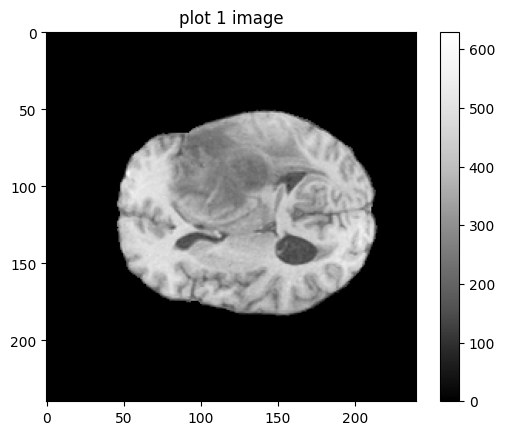

In [20]:
# TEST (Delete later): Plot 1 img
fig, axs = plt.subplots()
struct_fname, struct_nifti = load_nifti_img(subj_file="UPENN-GBM-00002_11", struct_scan="T1")
plot_struct_img(img_data=struct_nifti, fig=fig, axs=axs, row=0, col=0, title="plot 1 image")
plt.show()

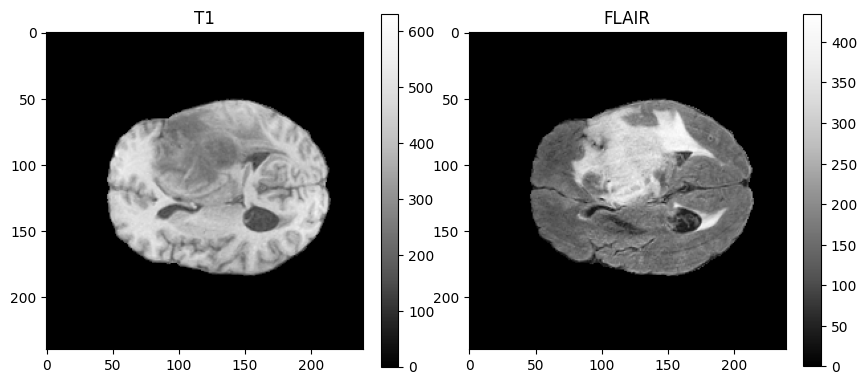

In [14]:
# TEST (Delete later): Plot 1 row and 2 cols
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
t1_fname, t1_nifti = load_nifti_img(subj_file="UPENN-GBM-00002_11", struct_scan="T1")
flair_fname, flair_nifti = load_nifti_img(subj_file="UPENN-GBM-00002_11", struct_scan="FLAIR")
plot_struct_img(img_data=t1_nifti, fig=fig, axs=axs, row=0, col=0, title="T1")
plot_struct_img(img_data=flair_nifti, fig=fig, axs=axs, row=0, col=1, title="FLAIR")
plt.show()

### 5.a. Plot the structural and segmented images and their corresponding reduced versions

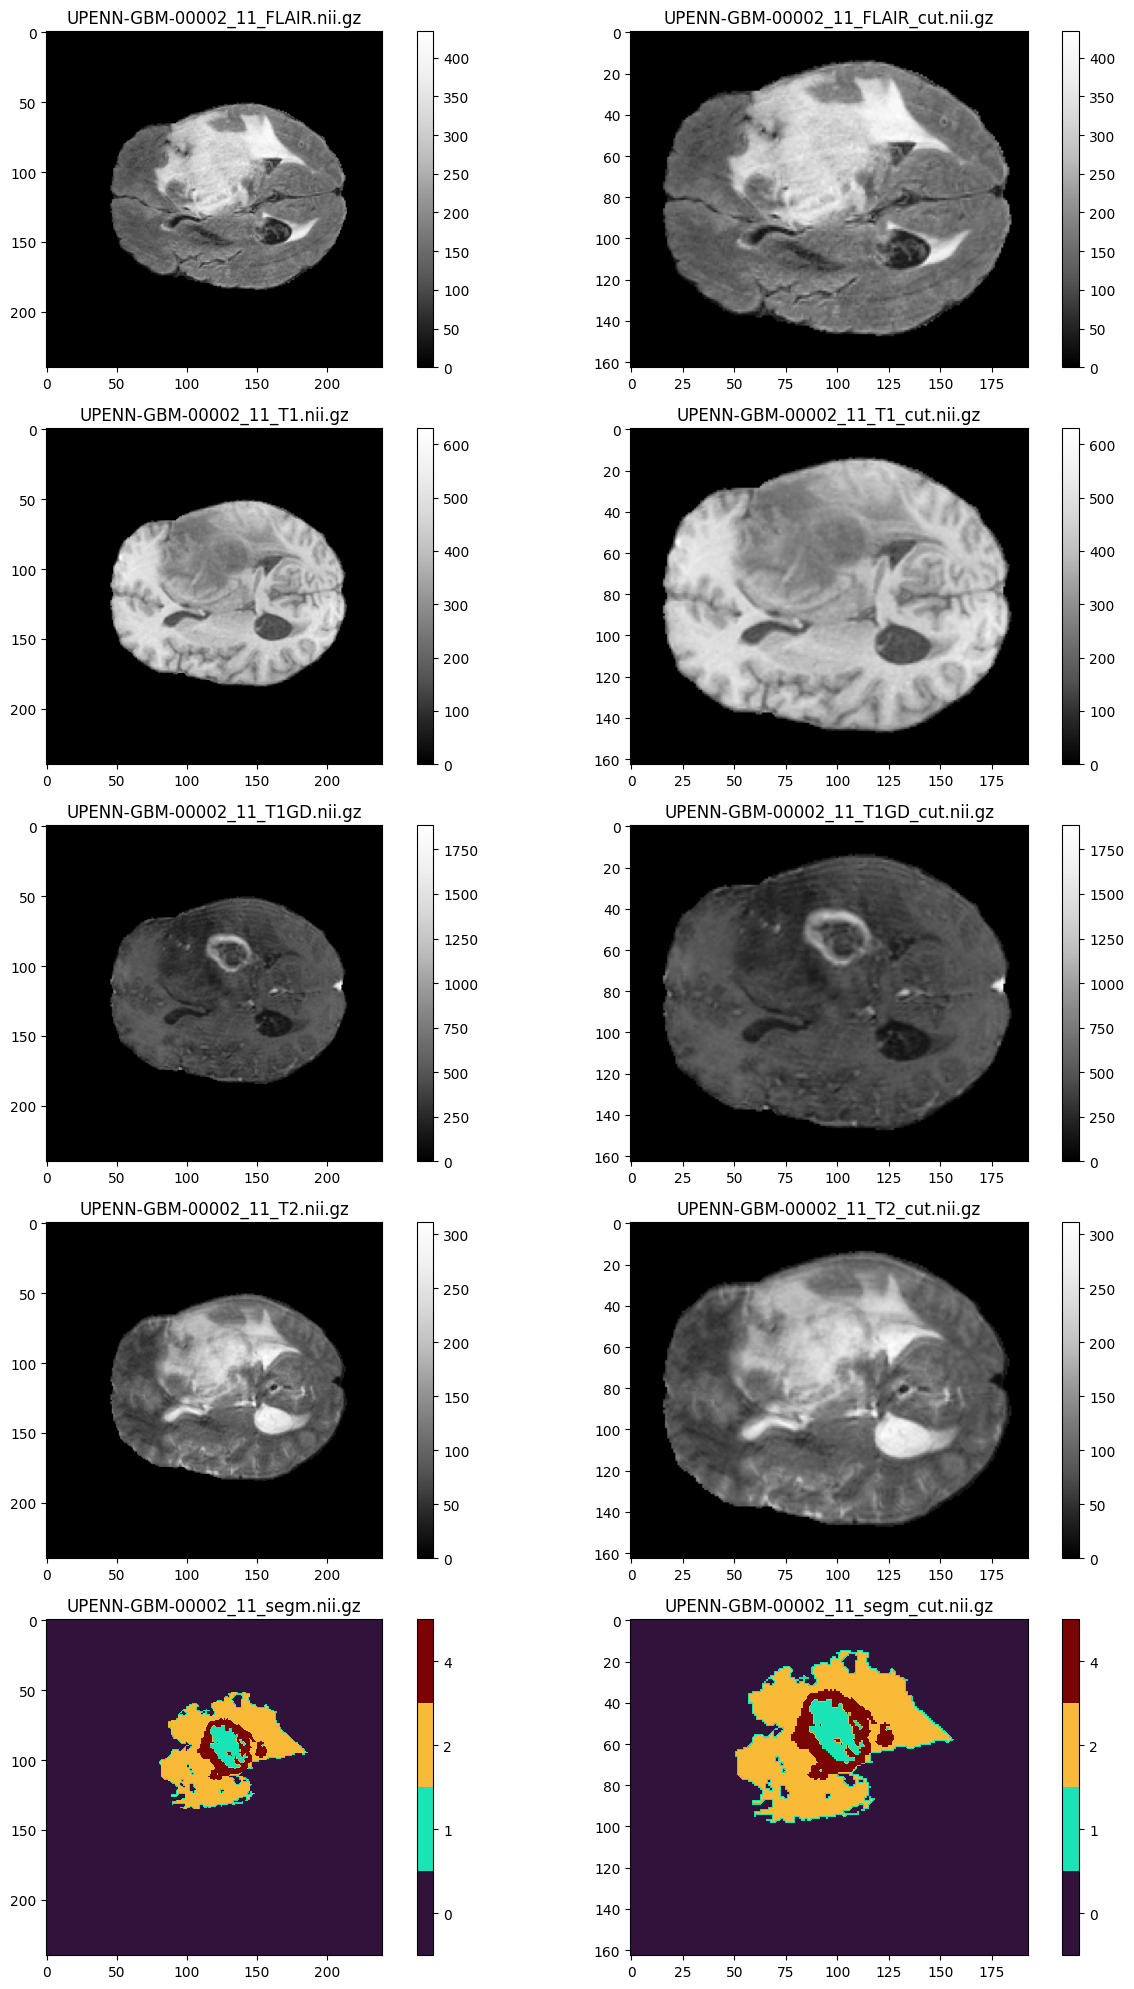

In [44]:
# extract the subject scan for the first manually-revised segmentation label e.g. UPENN-GBM-00002_11
subj_file = segm_files[0].split("_segm")[0]

# plot struct and corresponding reduced images
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(14, 20))

for row, struct_scan in enumerate(STRUCT_SCANS):
    # load and plot structural images on the first column
    struct_fname, struct_nifti = load_nifti_img(subj_file=subj_file, struct_scan=struct_scan)
    plot_struct_img(img_data=struct_nifti, fig=fig, axs=axs, row=row, col=0, title=struct_fname)

    # load and plot corresponding reduced images on the second column
    reduced_fname, reduced_nifti = load_nifti_img(subj_file=subj_file, struct_scan=struct_scan, reduced=True)
    plot_struct_img(img_data=reduced_nifti, fig=fig, axs=axs, row=row, col=1, title=reduced_fname)
    
# finally, add the segmentation label at the last row
# a. plot the segmented image
seg_fname, segm_nifti = load_nifti_img(subj_file=subj_file, segm=True)
plot_segm_img(img_data=segm_nifti, fig=fig, axs=axs, row=4, col=0, title=seg_fname)

# b. plot the reduced version of the segmented image
reduced_segm_fname, reduced_segm_nifti = load_nifti_img(subj_file=subj_file, segm=True, reduced=True)
plot_segm_img(img_data=reduced_segm_nifti, fig=fig, axs=axs, row=4, col=1, title=reduced_segm_fname)

# show the figure
plt.tight_layout()
plt.show()

In [ ]:
# Check labels
print("segmentation labels", np.unique(segm_nifti))
print("reduced segmentation labels",  np.unique(reduced_segm_nifti))

segmentation labels [0 1 2 4]
reduced segmentation labels [0 1 2 4]


### 5.b. Plot the segments as overlay to the structural images

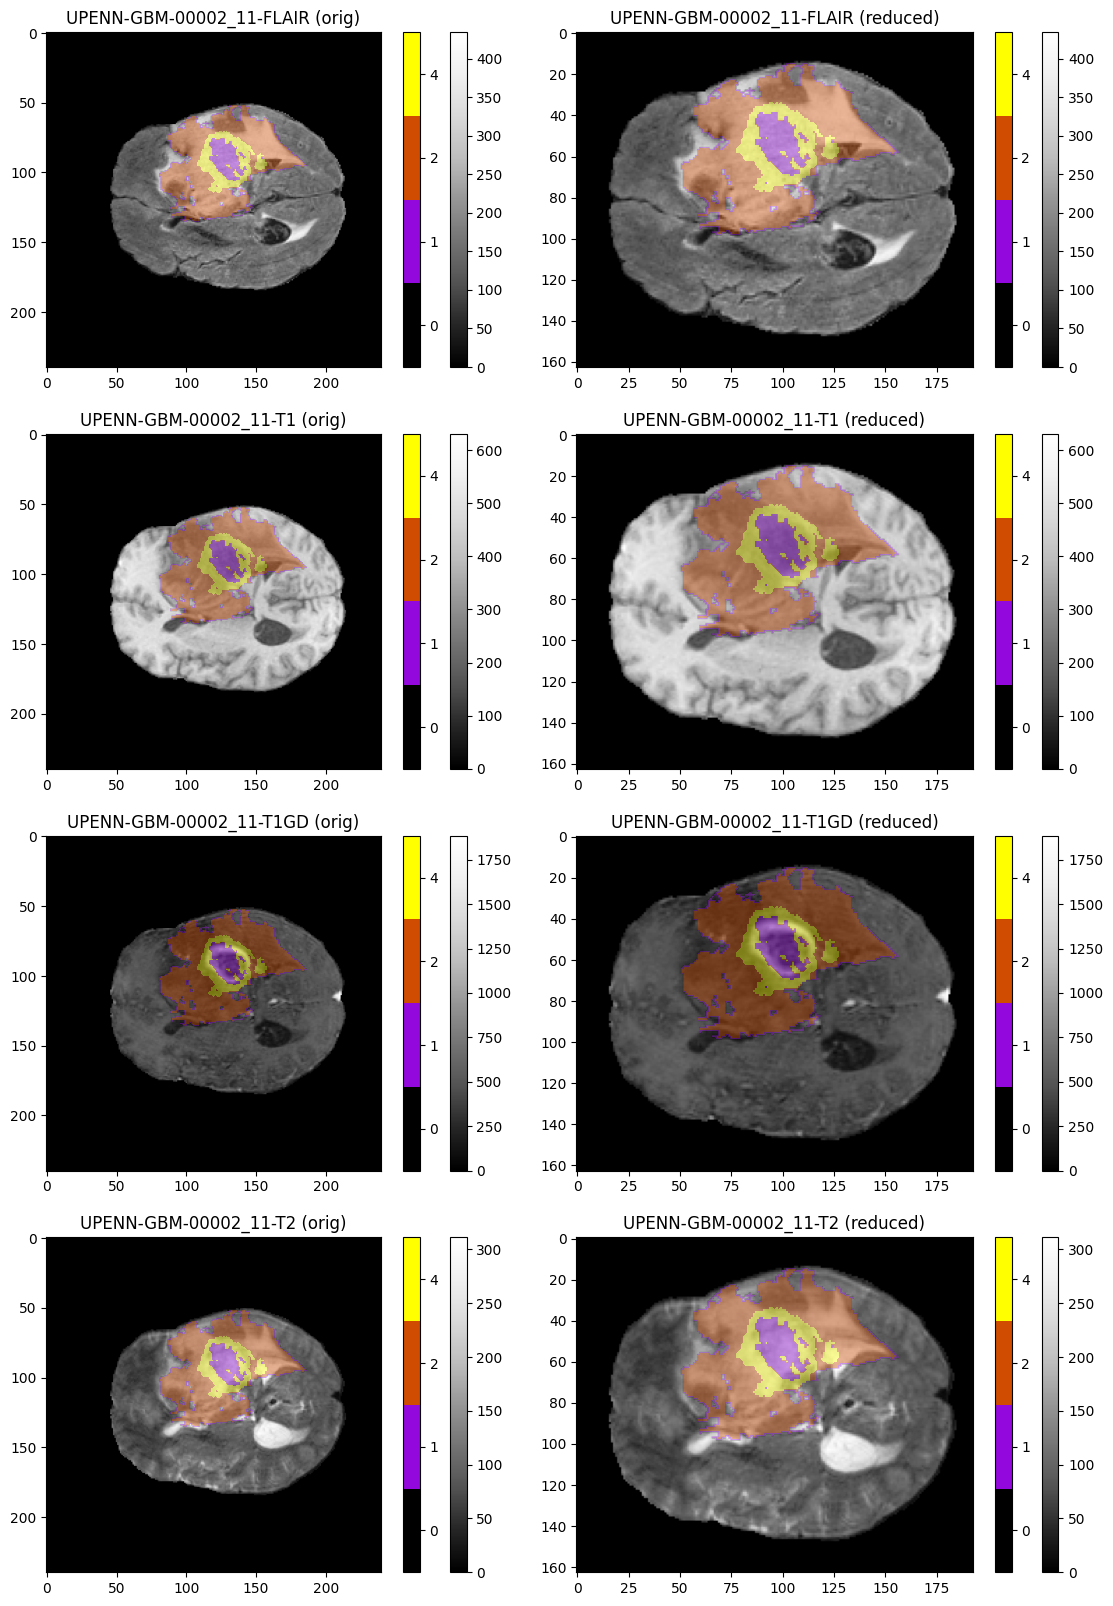

In [45]:
# extract the subject scan for the first manually-revised segmentation label e.g. UPENN-GBM-00002_11
subj_file = segm_files[0].split("_segm")[0]

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(14, 20))
for row, struct_scan in enumerate(STRUCT_SCANS):

    # load and plot structural images on the first column
    struct_fname, struct_nifti = load_nifti_img(subj_file=subj_file, struct_scan=struct_scan)
    plot_struct_img(img_data=struct_nifti, fig=fig, axs=axs, row=row, col=0, title=f"{subj_file}-{struct_scan} (orig)")

    # overlay segments on first column
    seg_fname, segm_nifti = load_nifti_img(subj_file=subj_file, segm=True)
    plot_segm_img(img_data=segm_nifti, fig=fig, axs=axs, row=row, col=0, overlay=True)

    # load and plot corresponding reduced images on the second column
    reduced_fname, reduced_nifti = load_nifti_img(subj_file=subj_file, struct_scan=struct_scan, reduced=True)
    plot_struct_img(img_data=reduced_nifti, fig=fig, axs=axs, row=row, col=1, title=f"{subj_file}-{struct_scan} (reduced)")

    # overlay reduced segments on second column
    red_seg_fname, red_segm_nifti = load_nifti_img(subj_file=subj_file, segm=True, reduced=True)
    plot_segm_img(img_data=red_segm_nifti, fig=fig, axs=axs, row=row, col=1, overlay=True)

### 5.c. Plot the first 5 annotated and auto labelled images side by side

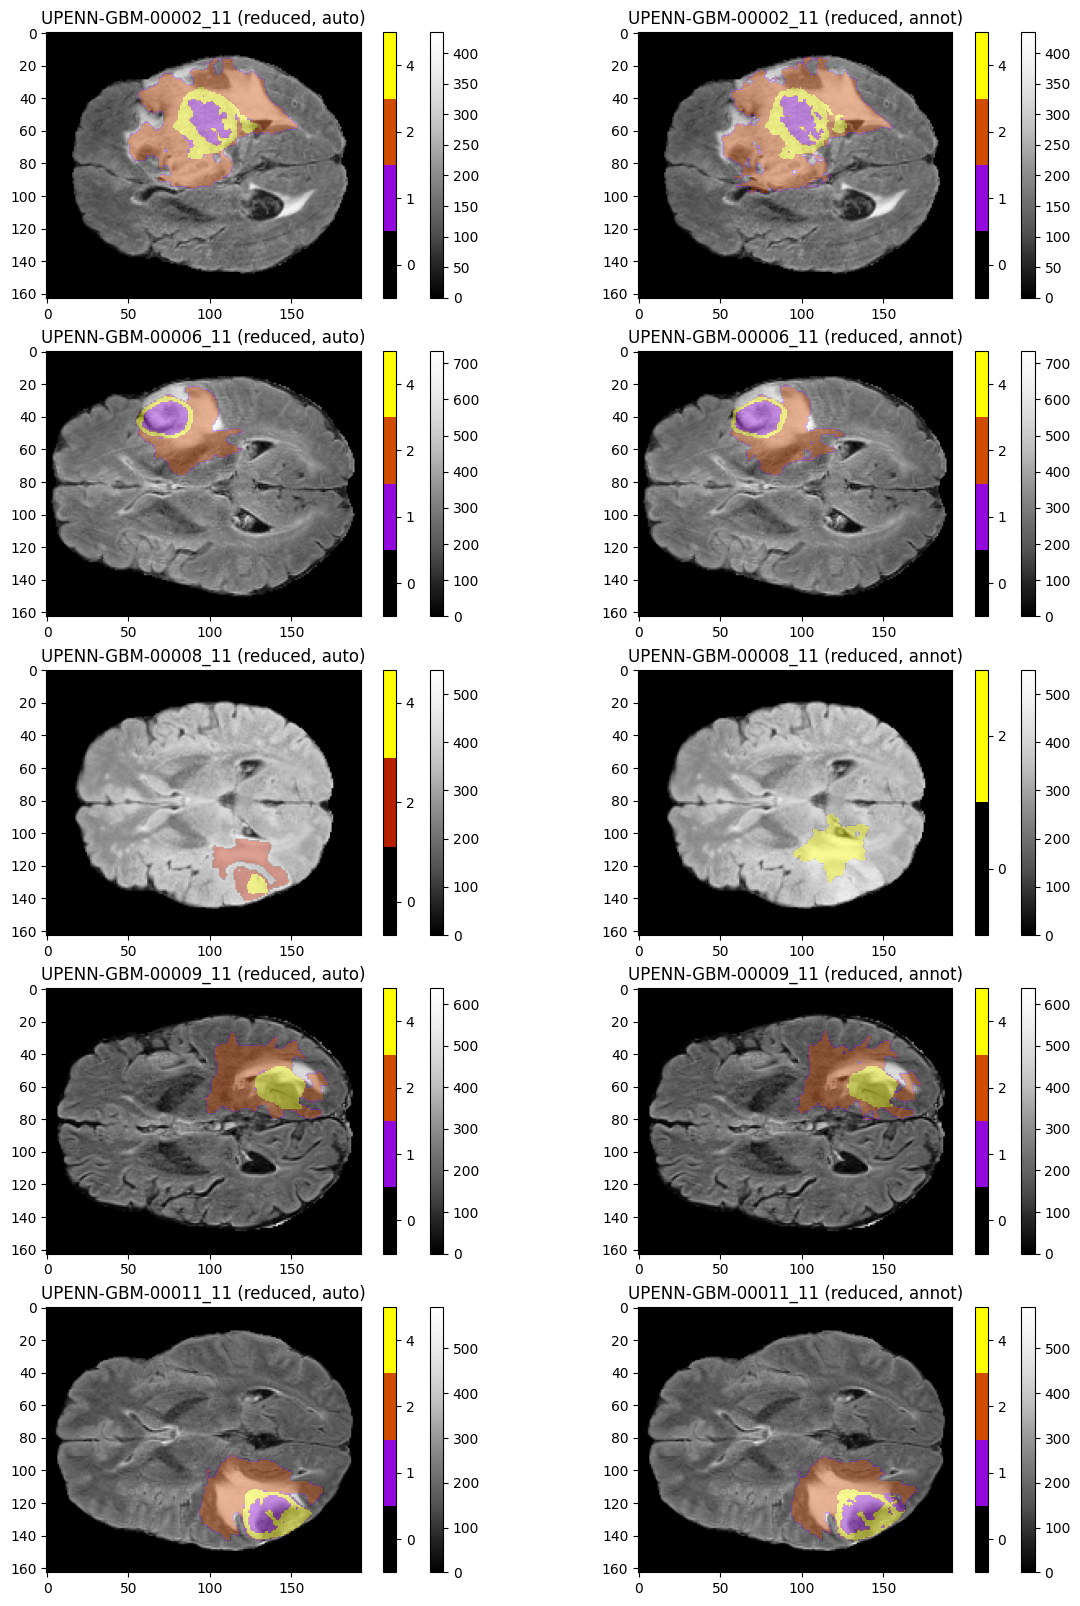

In [46]:
# load first 5 images
num_images = 5
fig, axs = plt.subplots(nrows=num_images, ncols=2, figsize=(14, 4*num_images))
for row in range(num_images):

  subj_file = segm_files[row].split("_segm")[0]

  # Plot the base image (reduced version) on both columns. Hardcode FLAIR as base image for now
  struct_reduced_fname, struct_reduced_nifti = load_nifti_img(subj_file=subj_file, struct_scan="FLAIR", reduced=True)
  for col in range(2):
    plot_struct_img(img_data=struct_reduced_nifti, fig=fig, axs=axs, row=row, col=col)

  # plot auto labelled (reduced) on first column
  auto_segm_red_fname, auto_segm_red_nifti = load_nifti_img(subj_file=subj_file, auto_segm=True, reduced=True)
  plot_segm_img(img_data=auto_segm_red_nifti, fig=fig, axs=axs, row=row, col=0, title=f"{subj_file} (reduced, auto)", overlay=True)
  
  # plot manually annotated (reduced) on second column
  segm_red_fname, segm_red_nifti = load_nifti_img(subj_file=subj_file, segm=True, reduced=True)
  plot_segm_img(img_data=segm_red_nifti, fig=fig, axs=axs, row=row, col=1, 
                title=f"{subj_file} (reduced, annot)", overlay=True)



## 6. visualize multiple samples at location with largest tumor spread

Working on sample No. 0 display slide No. 68  with  4973 non-zero pixels in label.
Working on sample No. 1 display slide No. 53  with  2110 non-zero pixels in label.
Working on sample No. 2 display slide No. 93  with  946 non-zero pixels in label.
Working on sample No. 3 display slide No. 91  with  2516 non-zero pixels in label.
Working on sample No. 4 display slide No. 86  with  2740 non-zero pixels in label.
Working on sample No. 5 display slide No. 95  with  774 non-zero pixels in label.
Working on sample No. 6 display slide No. 93  with  3143 non-zero pixels in label.
Working on sample No. 7 display slide No. 60  with  1497 non-zero pixels in label.
Working on sample No. 8 display slide No. 42  with  1272 non-zero pixels in label.
Working on sample No. 9 display slide No. 66  with  4219 non-zero pixels in label.
Working on sample No. 10 display slide No. 77  with  997 non-zero pixels in label.
Working on sample No. 11 display slide No. 87  with  1338 non-zero pixels in label.
Worki

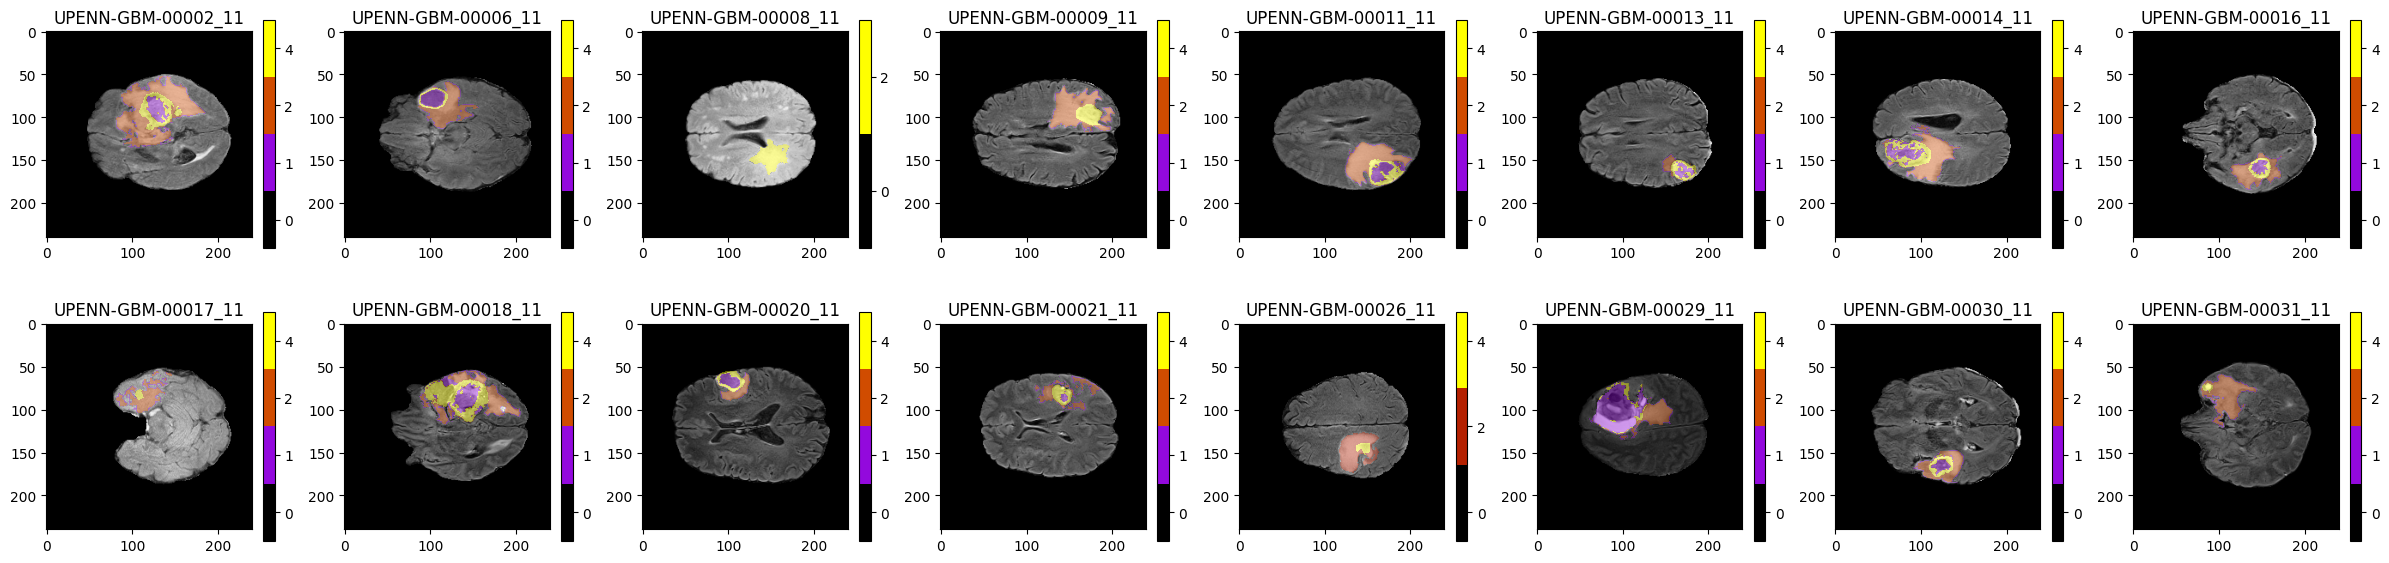

In [47]:
# visualize the structural images and its corresponding manually-revised segmentation label for starters
# set the number of plots per row and column
# Warning: needs high-RAM machine to run all (e.g. >80) plots
# nrows = 19
nrows = 2
ncols = 8

# set a constant color scale for all structure images
img_max = 1000
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3*ncols,3*nrows))

# iteratively load the file structural images and display them
for idx in range(nrows*ncols):
    
    # go until no more samples
    if idx >= len(segm_files):
        break

    # determine which row/col to plot the current axs
    row = idx // ncols
    col = idx % ncols

    # extract the subject scan for the first manually-revised segmentation label
    subj_file = segm_files[idx].split("_segm")[0]

    # load the images
    struct_fname, struct_nifti = load_nifti_img(subj_file=subj_file, struct_scan="FLAIR")
    segm_fname, segm_nifti = load_nifti_img(subj_file=subj_file, segm=True)
    
    # calculate slice idx
    slice_idx, nonzero_count = get_largest_tumor_slice_idx(segm_nifti)
    print("Working on sample No.", idx, "display slide No.", slice_idx, " with ", 
          nonzero_count, "non-zero pixels in label.")

    # plot the base image (reduced version) on both columns. Hardcode FLAIR as base image for now
    plot_struct_img(img_data=struct_nifti, fig=fig, axs=axs, row=row, col=col, 
                    auto_cbar=False, slice_idx=slice_idx)

    # plot manually annotated (reduced) as overlay
    plot_segm_img(img_data=segm_nifti, fig=fig, axs=axs, row=row, col=col, 
                  title=f"{subj_file}", overlay=True, slice_idx=slice_idx)
    
# show the figure
plt.tight_layout()
plt.show()
# fig.savefig('example_all_sample.pdf', format='pdf')


## 7. zero data removal QC

In [50]:
# find the shape of image and number of samples

# find dimensions
subj_file = segm_files[0].split("_segm")[0]
struct_fname, nifti = load_nifti_img(subj_file=subj_file, struct_scan="FLAIR")

nifti.shape
n0 = nifti.shape[0]
n1 = nifti.shape[1]
n2 = nifti.shape[2]
nsamp = len(segm_files)
n_files = len(STRUCT_SCANS)

### initialize
all_zero_a0 = np.zeros( (n0, nsamp) )
all_zero_a1 = np.zeros( (n1, nsamp) )
all_zero_a2 = np.zeros( (n2, nsamp) )

a0_min_idx = n0
a0_max_idx = 0
a1_min_idx = n1
a1_max_idx = 0
a2_min_idx = n2
a2_max_idx = 0

# find non-zero slides
for file_index in range(n_files):
    for idx in range(nsamp):
        # get the current image
        # extract the subject scan for the first manually-revised segmentation label
        subj_file = segm_files[idx].split("_segm")[0]
        struct = STRUCT_SCANS[file_index]
        nifti_fname, nifti = load_nifti_img(subj_file=subj_file, struct_scan=struct)

        # find all zero lines in each of the 3 dimensions
        all_zero_a01 = np.all(nifti == 0, axis=2)
        all_zero_a0[:,idx]  = np.all(all_zero_a01 == True, axis=1).astype(int)
        all_zero_a1[:,idx]  = np.all(all_zero_a01 == True, axis=0).astype(int)

        all_zero_a02 = np.all(nifti == 0, axis=1)
        all_zero_a2[:,idx]  = np.all(all_zero_a02 == True, axis=0).astype(int)

    # find all zero planes in each of the 3 dimensions
    a0_empty = np.all(all_zero_a0 == True, axis=1)
    a1_empty = np.all(all_zero_a1 == True, axis=1)
    a2_empty = np.all(all_zero_a2 == True, axis=1)

    # find new bound values
    a0_min_idx = np.min( (a0_min_idx, np.where(~a0_empty)[0].min()) )
    a0_max_idx = np.max( (a0_max_idx, np.where(~a0_empty)[0].max()) )
    a1_min_idx = np.min( (a1_min_idx, np.where(~a1_empty)[0].min()) )
    a1_max_idx = np.max( (a1_max_idx, np.where(~a1_empty)[0].max()) )
    a2_min_idx = np.min( (a2_min_idx, np.where(~a2_empty)[0].min()) )
    a2_max_idx = np.max( (a2_max_idx, np.where(~a2_empty)[0].max()) )

print("min idx in height is:",a0_min_idx,"max idx in height is:",a0_max_idx)
print("min idx in width is :",a1_min_idx,"max idx in width is :",a1_max_idx)
print("min idx in depth is :",a2_min_idx,"max idx in depth is :",a2_max_idx)

min idx in height is: 37 max idx in height is: 200
min idx in width is : 30 max idx in width is : 223
min idx in depth is : 0 max idx in depth is : 146


In [51]:
n0_new = a0_max_idx - a0_min_idx + 1
n1_new = a1_max_idx - a1_min_idx + 1
n2_new = a2_max_idx - a2_min_idx + 1
image_size_ratio = (a0_max_idx-a0_min_idx+1) * (a1_max_idx-a1_min_idx+1) * (a2_max_idx-a2_min_idx+1) / (n0 * n1 * n2)

print("Original height / width / depth :", n0, "/", n1, "/", n2)
print("     New height / width / depth :", n0_new, "/", n1_new, "/", n2_new)
print("Data reduction :", round((1-image_size_ratio)*100, 2), "%")

Original height / width / depth : 240 / 240 / 155
     New height / width / depth : 164 / 194 / 147
Data reduction : 47.61 %


## 8. reduced data and save structure MRI with annotations

In [63]:
# create a new folder, save all reduced data into the new folder
reduce_data_path = DATA_DIR + '/images_reduced'

if not os.path.exists(reduce_data_path):
  os.makedirs(reduce_data_path)

for idx in range(nsamp):
  # find folder name
  subj_file = segm_files[idx].split("_segm")[0]

  # working on structure files
  for file_index in range(n_files):
      # obtain file name
      struct = STRUCT_SCANS[file_index]
      nift_fname, nifti = load_nifti_img(subj_file=subj_file, struct_scan=struct, return_arr=False)
      
      # reduce data
      sliced_data = nifti.get_fdata()[a0_min_idx:a0_max_idx, a1_min_idx:a1_max_idx, a2_min_idx:a2_max_idx]
      sliced_nifti = nib.Nifti1Image(sliced_data, nifti.affine, nifti.header)
      
      # save reduced data
      # UPENN-GBM-00002_11_FLAIR.nii.gz
      save_fn = reduce_data_path + '/' + subj_file +"_" + struct + '_cut.nii'
      # nib.save(sliced_nifti, save_fn)

  # working on segm files
  nift_fname, nifti = load_nifti_img(subj_file=subj_file, segm=True, return_arr=False)

  # reduce data
  sliced_data = nifti.get_fdata()[a0_min_idx:a0_max_idx, a1_min_idx:a1_max_idx, a2_min_idx:a2_max_idx]
  sliced_nifti = nib.Nifti1Image(sliced_data, nifti.affine, nifti.header)

  # save reduced data
  save_fn = reduce_data_path + '/' + subj_file +"_" + struct + '_segm_cut.nii'
  nib.save(sliced_nifti, save_fn)


In [ ]:
# further compress file
import gzip
import shutil

input_dir  = 'data/images_reduced'
output_dir = 'data/images_annot_reduced'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# obtaina list of all nii files
files = os.listdir(input_dir)
for name in files:
    if name.find('.nii') == -1:
        files.remove(name)

# compress all files to .gz
for name in files:
    # Open the input .nii file for reading in binary mode
    input_nii_path = input_dir + '/' + name
    output_nii_gz_path = output_dir + '/' + name + '.gz'
    with open(input_nii_path, 'rb') as input_file:
        # Open the output .nii.gz file for writing in binary mode
        with gzip.open(output_nii_gz_path, 'wb') as output_file:
            # Copy the contents of the input file to the output file
            shutil.copyfileobj(input_file, output_file)


In [ ]:
# make a zip file
!zip -r images_annot_reduced.zip $output_dir

  adding: data/images_annot_reduced/ (stored 0%)
  adding: data/images_annot_reduced/UPENN-GBM-00154_11_FLAIR_cut.nii.gz (deflated 1%)
  adding: data/images_annot_reduced/UPENN-GBM-00030_11_segm_cut.nii.gz (deflated 44%)
  adding: data/images_annot_reduced/UPENN-GBM-00256_11_T2_cut.nii.gz (deflated 1%)
  adding: data/images_annot_reduced/UPENN-GBM-00196_11_T2_cut.nii.gz (deflated 0%)
  adding: data/images_annot_reduced/UPENN-GBM-00376_11_segm_cut.nii.gz (deflated 29%)
  adding: data/images_annot_reduced/UPENN-GBM-00254_11_T1GD_cut.nii.gz (deflated 0%)
  adding: data/images_annot_reduced/UPENN-GBM-00080_11_T1GD_cut.nii.gz (deflated 1%)
  adding: data/images_annot_reduced/UPENN-GBM-00054_11_FLAIR_cut.nii.gz (deflated 0%)
  adding: data/images_annot_reduced/UPENN-GBM-00139_11_T1_cut.nii.gz (deflated 0%)
  adding: data/images_annot_reduced/UPENN-GBM-00253_11_T2_cut.nii.gz (deflated 1%)
  adding: data/images_annot_reduced/UPENN-GBM-00312_11_T1GD_cut.nii.gz (deflated 0%)
  adding: data/image

## 9. PCA analysis on 4 input channels

In [ ]:
# download the images_structural.zip file
download(IMAGES_ANNOT_REDUCED_URL, filename=os.path.join(DATA_DIR, IMAGES_ANNOT_REDUCED_FNAME))

100%|██████████| 1.46G/1.46G [00:25<00:00, 57.0MiB/s]


Unzipping file...


Extracting files: 100%|██████████| 736/736 [00:08<00:00, 84.22it/s]


''

In [ ]:
DATA_DIR = 'data/images_annot_reduced'
files_all = os.listdir(DATA_DIR)

In [67]:
# find unique patent IDs
patent_id = []
for file_cur in files_all:
    patent_id.append( file_cur.split('_')[0])
patent_id_unique = list(set(patent_id))
patent_id_unique.sort()
print(len(patent_id_unique))

147


In [68]:
# find all files given a patent ID
patent_id = patent_id_unique[0]
files_id = [file_cur for file_cur in files_all if patent_id in file_cur]
files_id.sort()
print(files_id)

['UPENN-GBM-00002_11_FLAIR_cut.nii.gz', 'UPENN-GBM-00002_11_T1GD_cut.nii.gz', 'UPENN-GBM-00002_11_T1_cut.nii.gz', 'UPENN-GBM-00002_11_T2_cut.nii.gz', 'UPENN-GBM-00002_11_segm_cut.nii.gz']


In [ ]:
# load a test file to obtain dimensions
nifti_file = files_id[0]
nifti_path = os.path.join(DATA_DIR, nifti_file)
nifti = nib.load(nifti_path)
n0 = nifti.shape[0]
n1 = nifti.shape[1]
n2 = nifti.shape[2]
image_4_exp = np.zeros( (n0,n1,4,n2) )
print( image_4_exp.shape )

for idx in range(4):
    # obtain file name
    nifti_file = files_id[idx]
    nifti_path = os.path.join(DATA_DIR, nifti_file)
    nifti = nib.load(nifti_path)

    image_4_exp[:,:,idx,:] = nifti.get_fdata()[:, :, :]

i2 = n2//2
image_4_exp_slice = np.reshape( image_4_exp[:,:,:,i2], (n0,n1,4) )
print( image_4_exp_slice.shape )

(163, 193, 4, 146)
(163, 193, 4)


In [ ]:
c0_min = np.min(image_4_exp_slice[:,:,0])
c1_min = np.min(image_4_exp_slice[:,:,1])
c2_min = np.min(image_4_exp_slice[:,:,2])
c3_min = np.min(image_4_exp_slice[:,:,3])
c0_max = np.max(image_4_exp_slice[:,:,0])
c1_max = np.max(image_4_exp_slice[:,:,1])
c2_max = np.max(image_4_exp_slice[:,:,2])
c3_max = np.max(image_4_exp_slice[:,:,3])

print(c0_min,c0_max,c1_min,c1_max,c2_min,c2_max,c3_min,c3_max)

image_4_exp_slice[:,:,0] = image_4_exp_slice[:,:,0] / c0_max
image_4_exp_slice[:,:,1] = image_4_exp_slice[:,:,1] / c1_max
image_4_exp_slice[:,:,2] = image_4_exp_slice[:,:,2] / c2_max
image_4_exp_slice[:,:,3] = image_4_exp_slice[:,:,3] / c3_max

0.0 433.9989517573267 0.0 1885.0108152776957 0.0 630.0000303704292 0.0 311.00181575119495


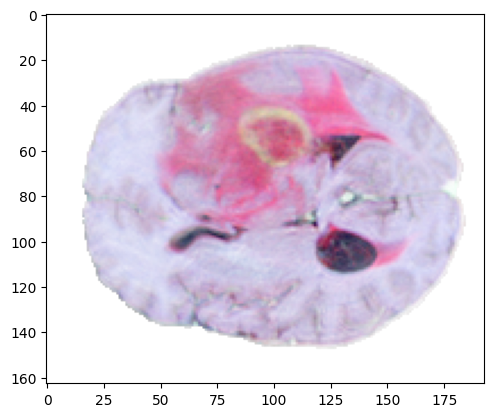

In [ ]:
plt.imshow(image_4_exp_slice)

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Assume image is a 3D numpy array with shape (height, width, 4)
image = image_4_exp_slice

# Reshape the image to be a 2D array where each row is a pixel and each column is a channel
pixels = image.reshape(-1, 4)

# Perform PCA
pca = PCA(n_components=3)
transformed_pixels = pca.fit_transform(pixels)

# Reshape the transformed pixels back into the original image shape, but with 3 channels instead of 4
transformed_image = transformed_pixels.reshape(*image.shape[:2], 3)


In [ ]:
# print eigen values
print(pca.explained_variance_)

[0.18579817 0.02857404 0.00650199]


In [ ]:
# print weights in linear combinition
print(pca.components_)

[[ 0.5536075   0.25649434  0.63428797  0.47477169]
 [ 0.40414222 -0.21463362 -0.68776259  0.56354601]
 [-0.72804319  0.09118946  0.09498855  0.67276651]]


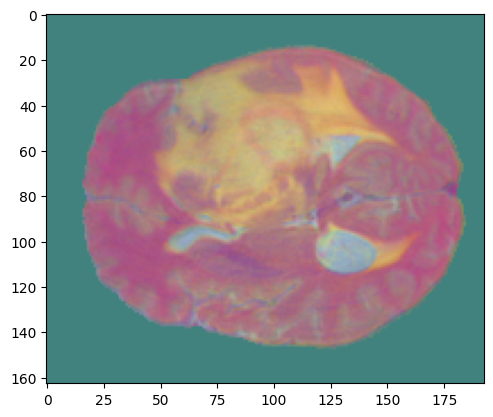

In [ ]:
plt.imshow(transformed_image[:,:,:]/2+0.5)

In [ ]:
pca_image = np.concatenate((transformed_image[:,:,0]/2+0.5, transformed_image[:,:,1]/2+0.5, transformed_image[:,:,2]/2+0.5), axis=1)

org_image = np.concatenate((image_4_exp_slice[:,:,0],image_4_exp_slice[:,:,1],image_4_exp_slice[:,:,2],image_4_exp_slice[:,:,3],), axis=1)

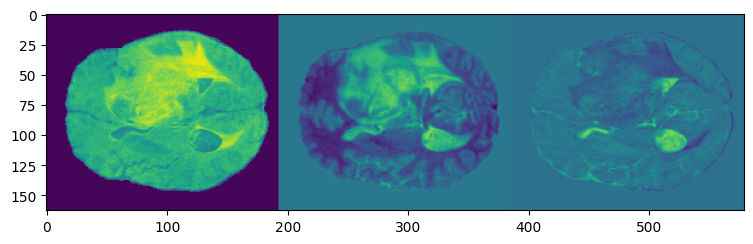

In [ ]:
plt.figure(figsize=(9,3))
plt.imshow(pca_image)

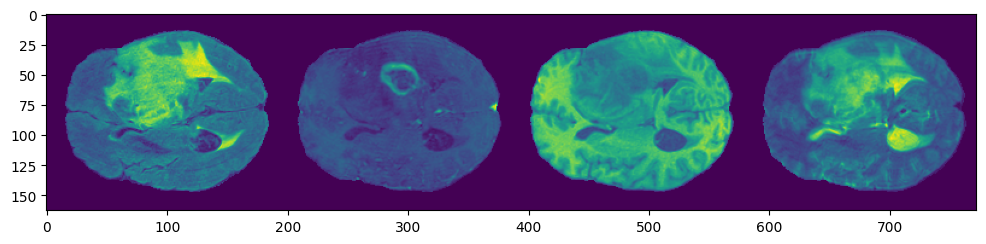

In [ ]:
plt.figure(figsize=(12,3))
plt.imshow(org_image)

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Assume image is a 3D numpy array with shape (height, width, 4)
image = image_4_exp_slice[:,:,0:3].copy()
image[:,:,1] = image_4_exp_slice[:,:,3]

# Reshape the image to be a 2D array where each row is a pixel and each column is a channel
pixels = image.reshape(-1, 3)

# Perform PCA
pca = PCA(n_components=2)
transformed_pixels = pca.fit_transform(pixels)

# Reshape the transformed pixels back into the original image shape, but with 3 channels instead of 4
transformed_image = transformed_pixels.reshape(*image.shape[:2], 2)


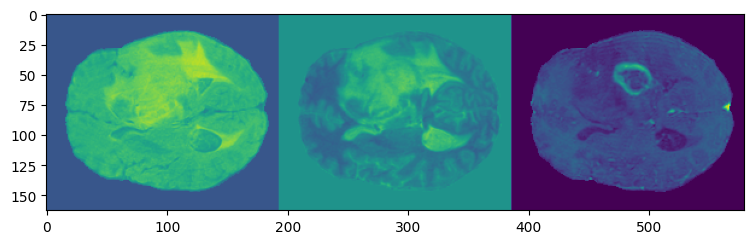

In [ ]:
pca_image = np.concatenate((transformed_image[:,:,0]/2+0.5, transformed_image[:,:,1]/2+0.5, image_4_exp_slice[:,:,1]), axis=1)
plt.figure(figsize=(9,3))
plt.imshow(pca_image)